# 非負のOMPによるスパース符号化

## 目的
- 最終的なゴールはNN-KSVD
- 今回はNN-KSVD内で用いる非負のOMP(NN-OMP)をテストする
- NN-OMPは`pyomp`と言うライブラリを用いる
- また、非負制約を用いないOMPについても実行し結果をみる

## テストする方法
- 信号y (真の辞書とスパースコードをランダムに生成しそれらの積)だけから元の辞書とスパースコードを復元する


### ライブラリのインポート

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from nsr import _make_nn_sparse_coded_signal
from pyomp.omp import omp 

### 真の辞書とスパースコードをランダムに生成し、信号yを作成する

In [15]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17
y, X, w = _make_nn_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)
idx, = w.nonzero()

### 真のスパース信号をプロット

<Container object of 3 artists>

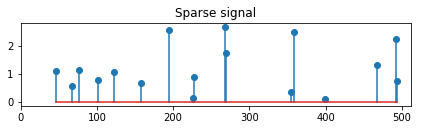

In [16]:
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

### ライブラリを用いて非負のOMPを実行

In [51]:
omp_result = omp(X, y, ncoef=n_nonzero_coefs, nonneg=True, verbose=False)
est_w = omp_result.coef
est_idx, = est_w.nonzero()


Found solution with max number of coefficients.


### OMPによって計算されたスパース信号をプロット

<Container object of 3 artists>

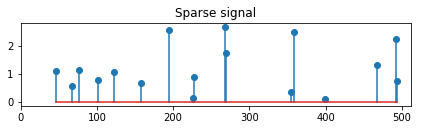

In [52]:
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

結果から、正しく非負のスパース信号が得られることがわかった。

### 非負制約のないOMP

In [63]:
from sklearn.linear_model import OrthogonalMatchingPursuit
omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp_model.fit(X, y)
coef = omp_model.coef_
idx_r, = coef.nonzero()

<Container object of 3 artists>

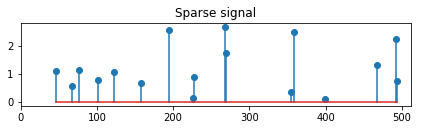

In [65]:
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx_r, coef[idx_r])

結果から、正しく非負のスパース信号が得られることがわかった。

## 結論

- NN-KSVD内で用いる非負のOMP(NN-OMP)をテストした
- `pyomp`を用いて非負のOMPを実行し、真のスパース信号に近い非負のスパース信号を得ることができた。
- `sklearn`ライブラリの非負制約なしOMPを実行し、真のスパース信号に近い非負のスパース信号を得ることができた。
- 非負の制約なしにOMPを実行しても非負のスパース信号を得ることがわかった。
